In [4]:
%matplotlib widget
from mayavi import mlab

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy
sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [7]:
mlab.init_notebook(backend='x3d')

Notebook initialized with x3d backend.


We start from plotting basics in Python environment, in the meanwhile refresh the system of linear equations.

# <font face="gotham" color="purple"> Visualisation of A System of Two Linear Equations </font>

Consider a linear system of two equations:
\begin{align}
x+y&=6\\
x-y&=-4
\end{align}
Easy to solve: $(x, y)^T = (1, 5)^T$. Let's plot the linear system.

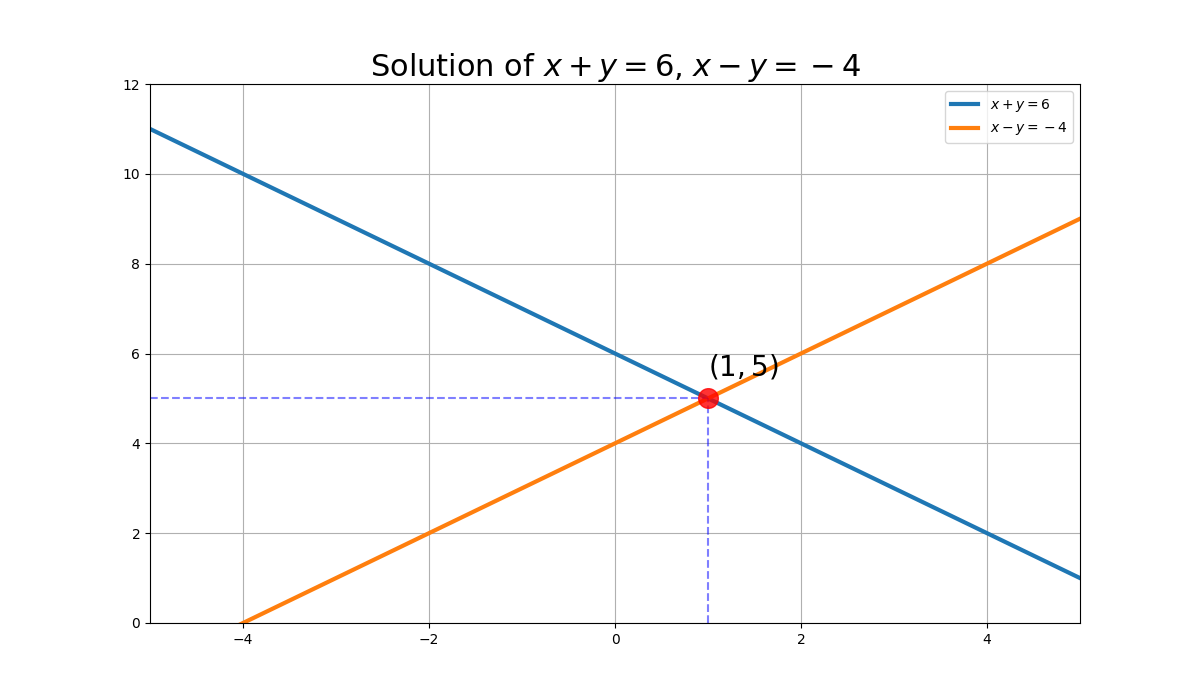

In [8]:
x = np.linspace(-5, 5, 100)
y1 = -x + 6
y2 = x + 4

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(1, 5, s = 200, zorder=5, color = 'r', alpha = .8) 

ax.plot(x, y1, lw =3, label = '$x+y=6$')
ax.plot(x, y2, lw =3, label = '$x-y=-4$')
ax.plot([1, 1], [0, 5], ls = '--', color = 'b', alpha = .5)
ax.plot([-5, 1], [5, 5], ls = '--', color = 'b', alpha = .5)
ax.set_xlim([-5, 5])
ax.set_ylim([0, 12])

ax.legend()
s = '$(1,5)$'
ax.text(1, 5.5, s, fontsize = 20)
ax.set_title('Solution of $x+y=6$, $x-y=-4$', size = 22)
ax.grid()

# <font face="gotham" color="purple"> How to Draw a Plane </font>

Before drawing a plane, let's refresh the logic of Matplotlib 3D plotting. This should be familiar to you if you are a MATLAB user. 

First, create meshgrids.

In [9]:
x, y = [-1, 0, 1], [-1, 0, 1]
X, Y = np.meshgrid(x, y)

Mathematically, meshgrids are the coordinates of <font face="gotham" color="red">Cartesian product</font>. To illustrate, we can plot all the coordinates of these meshgrids

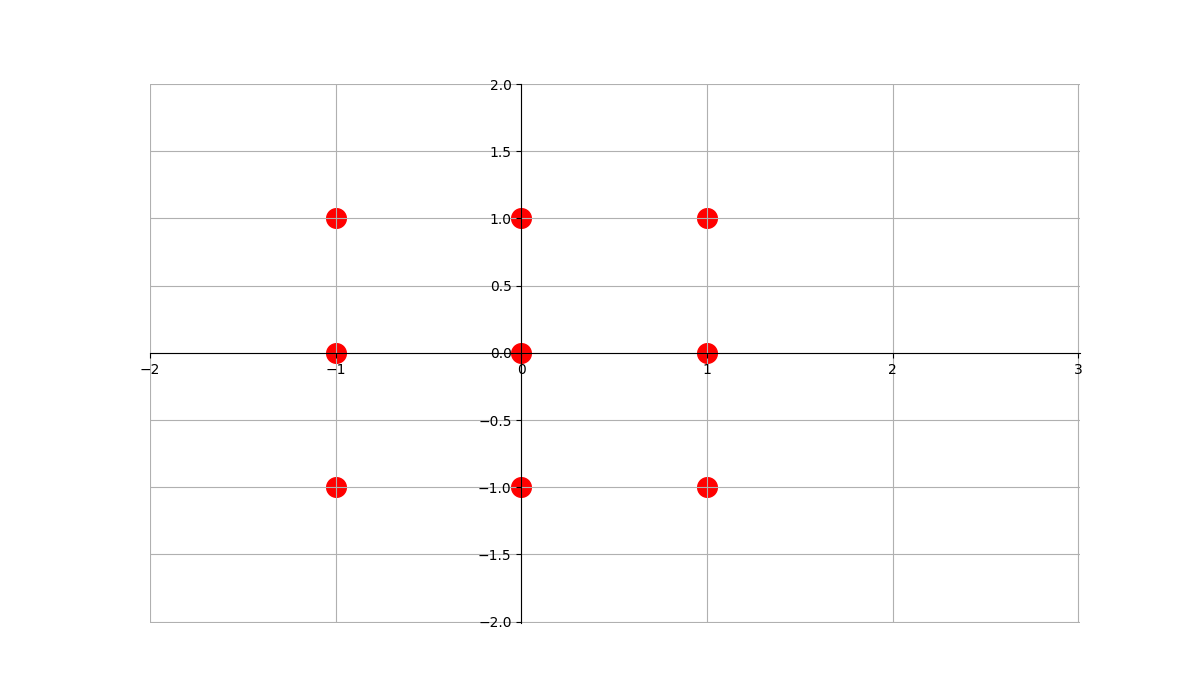

In [10]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(X, Y, s = 200, color = 'red')
ax.axis([-2, 3.01, -2.01, 2])
ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()
plt.show()

Try a more complicated meshgrid.

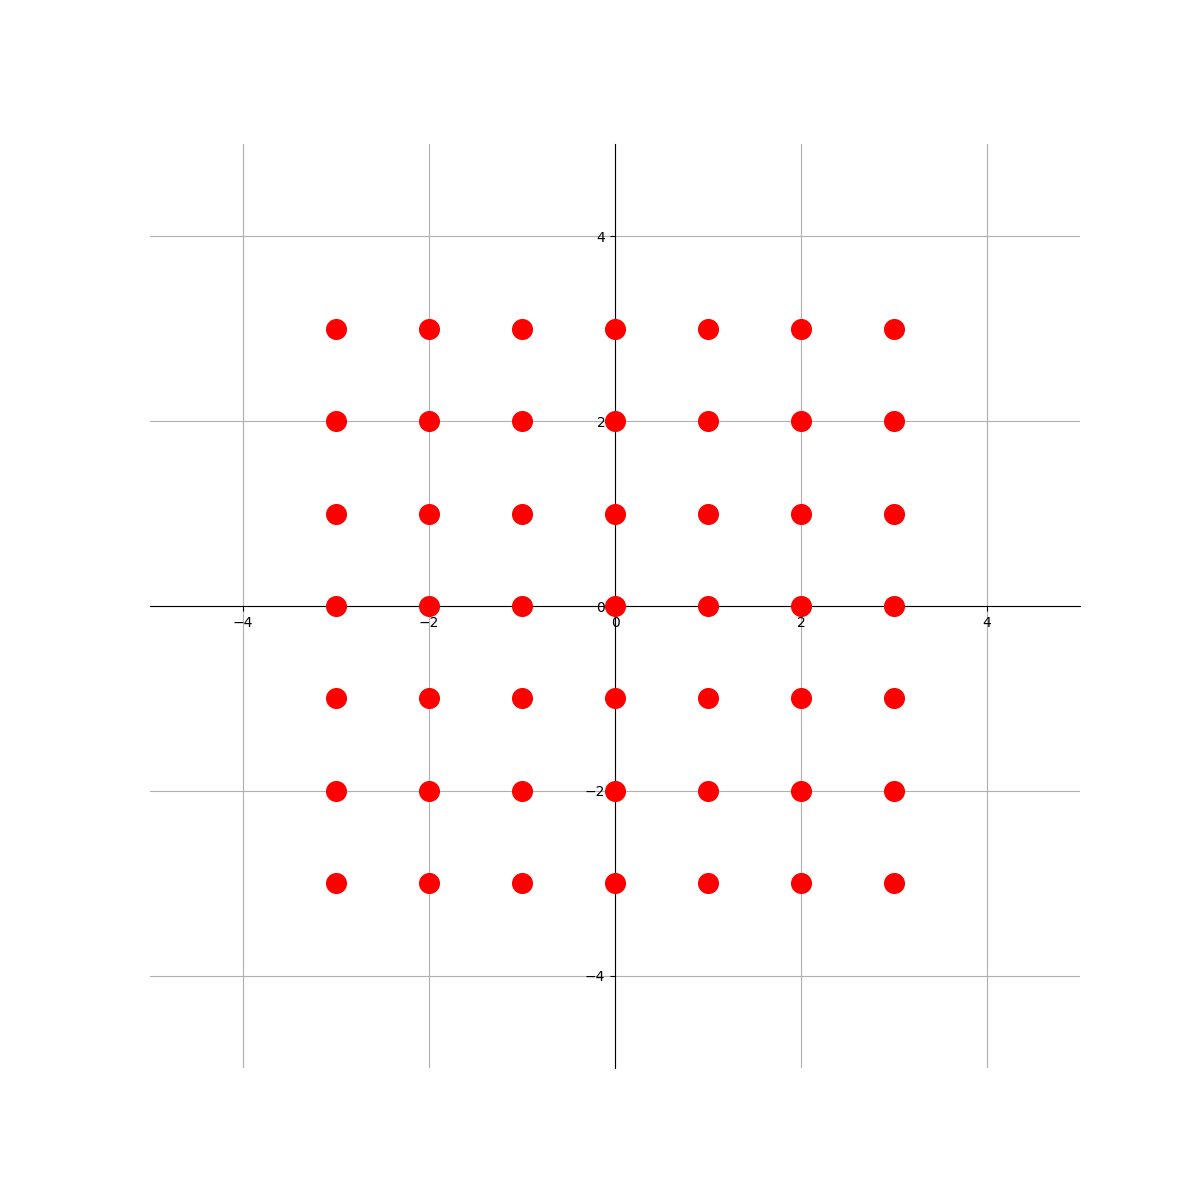

In [11]:
x, y = np.arange(-3, 4, 1), np.arange(-3, 4, 1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(X, Y, s = 200, color = 'red', zorder = 3)
ax.axis([-5, 5, -5, 5])

ax.spines['left'].set_position('zero') # alternative position is 'center'
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
ax.grid()

Now consider the function $z = f(x, y)$, $z$ is in the $3rd$ dimension. Though Matplotlib is not meant for delicate plotting of 3D graphics, basic 3D plotting is still acceptable. 

For example, we define a simple plane as 
$$z= x + y$$
Then plot $z$

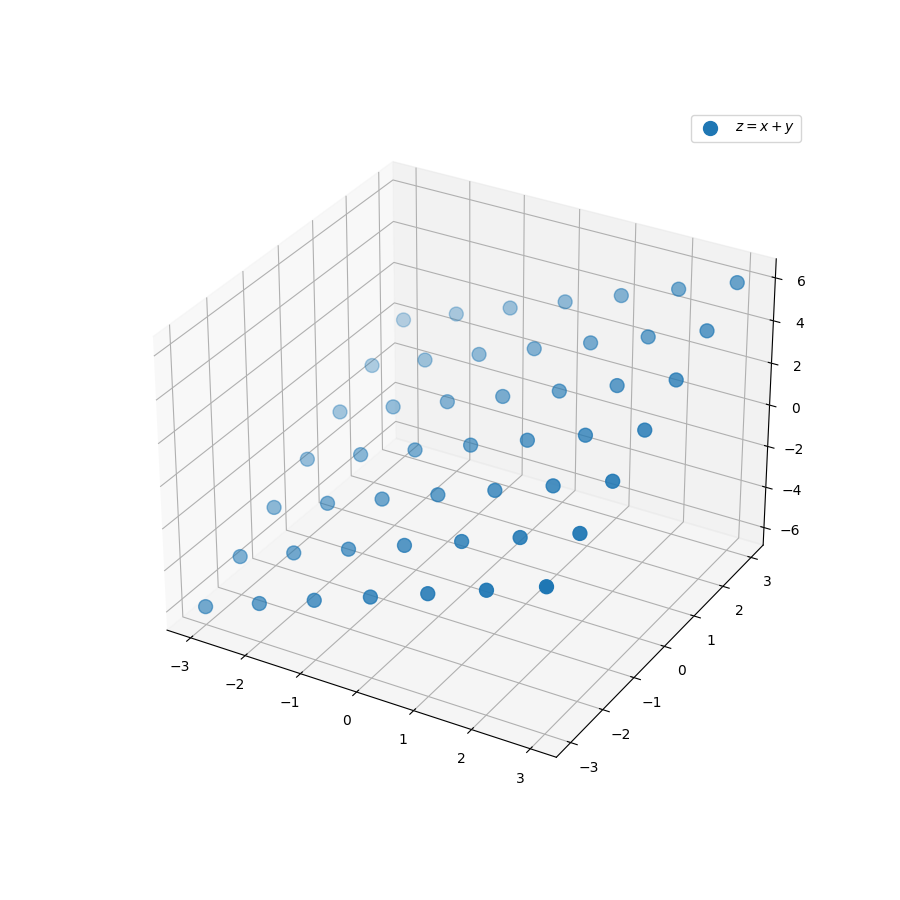

In [12]:
Z = X + Y
fig = plt.figure(figsize = (9,9))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X, Y, Z, s = 100, label = '$z=x+y$')
ax.legend()
plt.show()

Or we can plot it as a surface, Matplotlib will automatically interpolate values among the Cartesian coordinates such that the graph will look like a surface.

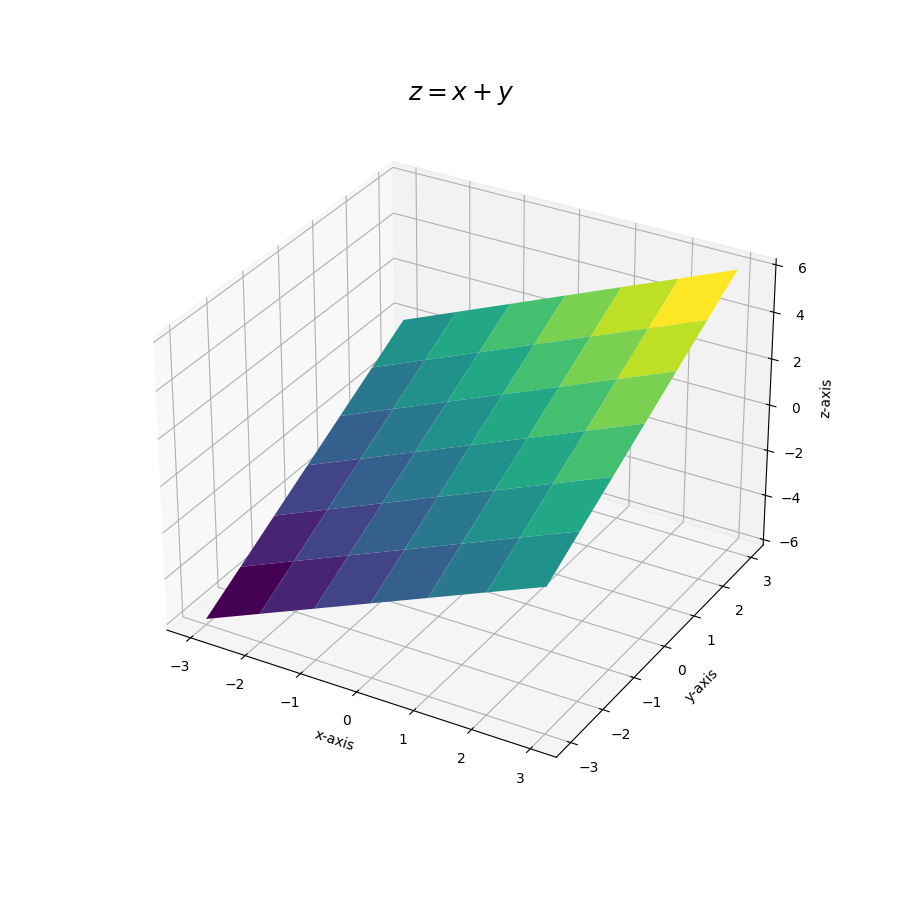

In [13]:
fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')
ax.plot_surface(X, Y, Z, cmap ='viridis') # MATLAB default color map
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')
ax.set_title('$z=x+y$', size = 18)
plt.show()

# <font face="gotham" color="purple"> Visualisation of A System of Three Linear Equations  </font>

We have reviewed on plotting planes, now we are ready to plot several planes all together.

Consider this system of linear equations
\begin{align}
x_1- 2x_2+x_3&=0\\
2x_2-8x_3&=8\\
-4x_1+5x_2+9x_3&=-9
\end{align}
And solution is $(x_1, x_2, x_3)^T = (29, 16, 3)^T$. Let's reproduce the system visually.

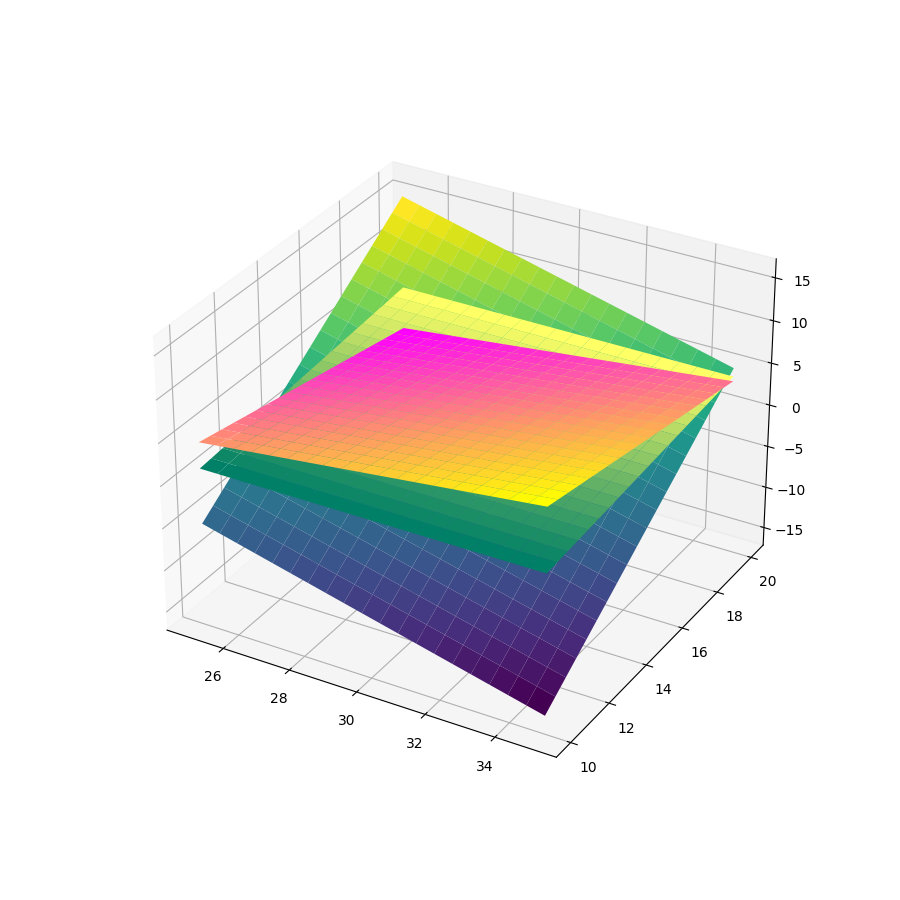

In [14]:
x1 = np.linspace(25, 35, 20)
x2 = np.linspace(10, 20, 20)
X1, X2 = np.meshgrid(x1, x2)

fig = plt.figure(figsize = (9, 9))
ax = fig.add_subplot(111, projection = '3d')

X3 = 2*X2 - X1
ax.plot_surface(X1, X2, X3, cmap ='viridis', alpha = 1) 

X3 = .25*X2 - 1
ax.plot_surface(X1, X2, X3, cmap ='summer', alpha = 1)

X3 = -5/9*X2 + 4/9*X1 - 1
ax.plot_surface(X1, X2, X3, cmap ='spring', alpha = 1)

ax.scatter(29, 16, 3, s = 200, color = 'black')
plt.show()

We are certain there is a solution, however the graph does not show the intersection of planes. The problem originates from Matplotlib's rendering algorithm, which is not designed for drawing genuine 3D graphics. It merely projects 3D objects onto 2D dimension to imitate 3D features.

Mayavi is much professional in rendering 3D graphics, we give an example here. If not installed, run ```conda install -c anaconda mayavi```.

In [15]:
mlab.clf()
X1, X2 = np.mgrid[-10:10:21*1j, -5:10:21*1j]
X3 = 6 - X1 - X2
mlab.mesh(X1, X2, X3,colormap="spring")
X3 = 3 - 2*X1 + X2
mlab.mesh(X1, X2, X3,colormap="winter")
X3 = 3*X1 + 2*X2 -4
mlab.mesh(X1, X2, X3,colormap="summer")
mlab.axes()
mlab.outline()
mlab.points3d(1, 2, 3, color = (.8, 0.2, .2), )
mlab.title('A System of Linear Equations')

## <font face="gotham" color="purple"> Visualisation of An Inconsistent System </font>

Now let's visualise the linear system that does not have a solution.

\begin{align}
x+y+z&=1\\
x-y-2z&=2\\
2x-z&=1
\end{align}
Rearrange the system to solve for $z$:

\begin{align}
z&=1-x-y\\
z&=\frac{x}{2}-\frac{y}{2}+1\\
z&=2x-1
\end{align}

In [16]:
mlab.clf()
X, Y = np.mgrid[-5:5:21*1j, -5:5:21*1j]
Z = 1 - X - Y
mlab.mesh(X, Y, Z,colormap="spring")

Z = X/2 - Y/2 + 1
mlab.mesh(X, Y, Z,colormap="summer")

Z = 2*X - 1
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A Inconsistent System of Linear Equations')

## <font face="gotham" color="purple"> Visualisation of A System With Infinite Numbers of Solutions </font>

Our system of equations is given

\begin{align}
y-z=&4\\
2x+y+2z=&4\\
2x+2y+z=&8
\end{align}

Rearrange to solve for $z$

\begin{align}
z=&y-4\\
z=&2-x-\frac{y}{2}\\
z=&8-2x-2y
\end{align}

In [17]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")
mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

The solution of the system is $(x,y,z)=(-3z/2,z+4,z)^T$, where $z$ is a **free variable**. 

The solution is an infinite line in $\mathbb{R}^3$, to visualise the solution requires setting a range of $x$ and $y$, for instance we can set

\begin{align}
-2 \leq x \leq 2\\
2 \leq y \leq 6
\end{align}

which means

\begin{align}
-2\leq -\frac32z\leq 2\\
2\leq z+4 \leq 6
\end{align}

We can pick one inequality to set the range of $z$, e.g. second inequality: $-2 \leq z \leq 2$. 

Then plot the planes and the solutions together.

In [18]:
mlab.clf()
X, Y = np.mgrid[-2:2:21*1j, 2:6:21*1j]
Z = Y - 4
mlab.mesh(X, Y, Z,colormap="spring")

Z = 2 - X - Y/2
mlab.mesh(X, Y, Z,colormap="summer")

Z = 8 - 2*X - 2*Y
mlab.mesh(X, Y, Z,colormap="autumn")

ZL = np.linspace(-2, 2, 20) # ZL means Z for line, we have chosen the range [-2, 2]
X = -3*ZL/2
Y = ZL + 4

mlab.plot3d(X, Y, ZL)

mlab.axes()
mlab.outline()
mlab.title('A System of Linear Equations With Infinite Number of Solutions')

# <font face="gotham" color="purple"> Reduced Row Echelon Form </font>

For easy demonstration, we will be using SymPy frequently in lectures. SymPy is a very power symbolic computation library, we will see its basic features as the lectures move forward.

We define a SymPy matrix:

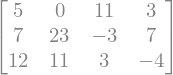

In [19]:
M = sy.Matrix([[5, 0, 11, 3], [7, 23, -3, 7], [12, 11, 3, -4]]); M

Think of it as an **augmented matrix** which combines coefficients of linear system. With row operations, we can solve the system quickly. Let's turn it into a **row reduced echelon form**.

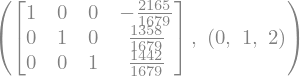

In [20]:
M_rref = M.rref(); M_rref # .rref() is the SymPy method for row reduced echelon form

Take out the first element in the big parentheses, i.e. the rref matrix.

In [21]:
M_rref = np.array(M_rref[0]);M_rref

array([[1, 0, 0, -2165/1679],
       [0, 1, 0, 1358/1679],
       [0, 0, 1, 1442/1679]], dtype=object)

If you don't like fractions, convert it into float type.

In [22]:
M_rref.astype(float)

array([[ 1.   ,  0.   ,  0.   , -1.289],
       [ 0.   ,  1.   ,  0.   ,  0.809],
       [ 0.   ,  0.   ,  1.   ,  0.859]])

The last column of the rref matrix is the solution of the system.

## <font face="gotham" color="purple"> Example: rref and Visualisation </font>

Let's use ```.rref()``` method to compute a solution of a system then visualise it. Consider the system:

\begin{align}
3x+6y+2z&=-13\\
x+2y+z&=-5\\
-5x-10y-2z&=19
\end{align}

Extract the augmented matrix into a SymPy matrix:

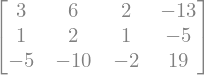

In [23]:
A = sy.Matrix([[3, 6, 2, -13], [1, 2, 1, -5], [-5, -10, -2, 19]]);A

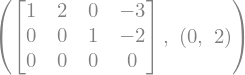

In [24]:
A_rref = A.rref(); A_rref

In case you are wondering what's $(0, 2)$: they are the column number of pivot columns, in the augmented matrix above the pivot columns resides on the $0$th and $2$nd column.

Because it's not a rank matrix, therefore solutions is in general form
\begin{align}
x + 2y & = -3\\
z &= -2\\
y &= free
\end{align}
Let's pick 3 different values of $y$, for instance $(3, 5, 7)$, to calculate $3$ special solutions:

In [25]:
point1 = (-2*3-3, 3, -2)
point2 = (-2*5-3, 5, -2)
point3 = (-2*7-3, 7, -2)
special_solution = np.array([point1, point2, point3]); special_solution # each row is a special solution

array([[ -9,   3,  -2],
       [-13,   5,  -2],
       [-17,   7,  -2]])

We can visualise the general solution, and the 3 specific solutions altogether.

In [26]:
y = np.linspace(2, 8, 20) # y is the free variable
x = -3 - 2*y
z = np.full((len(y), ), -2) # z is a constant

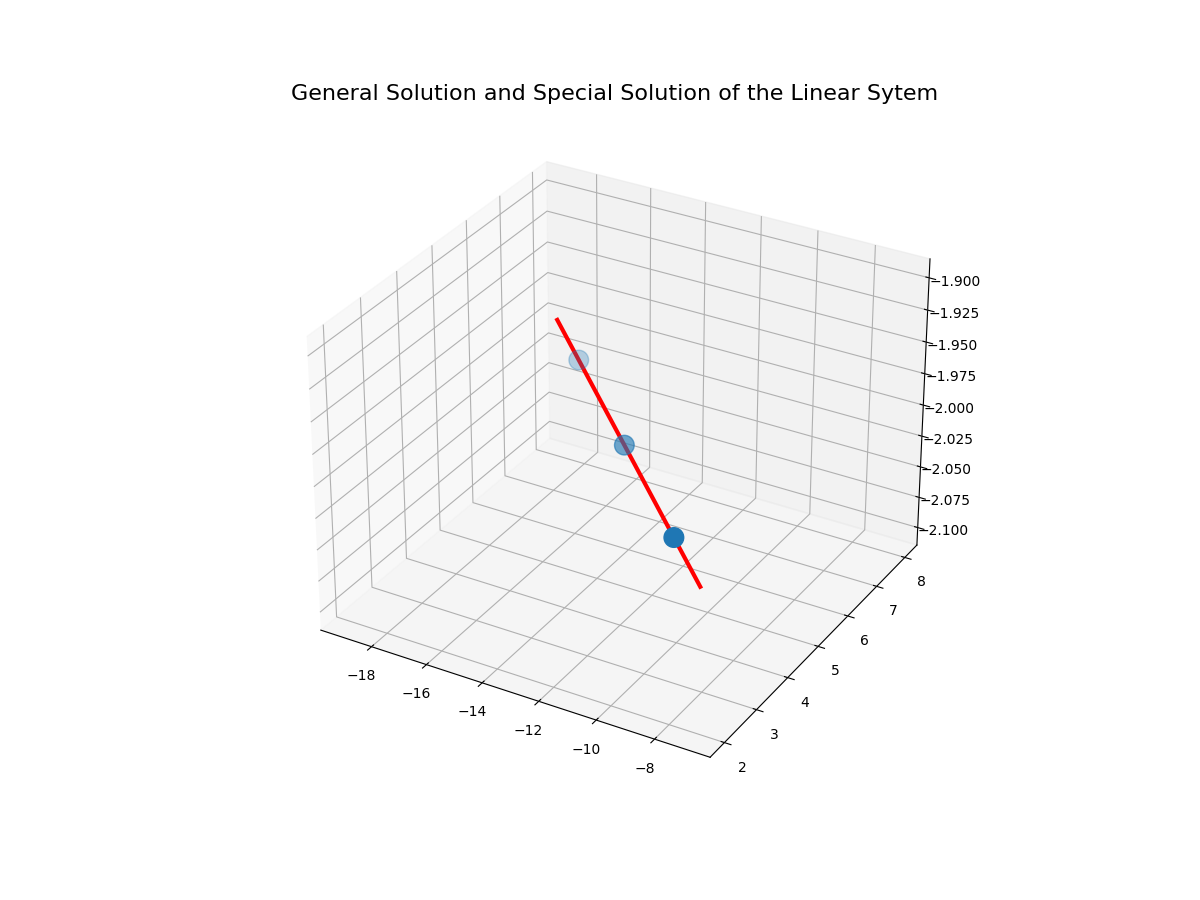

In [27]:
fig = plt.figure(figsize = (12,9))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, lw = 3, color = 'red')
ax.scatter(special_solution[:,0], special_solution[:,1], special_solution[:,2], s = 200)
ax.set_title('General Solution and Special Solution of the Linear Sytem', size= 16)
plt.show()

## <font face="gotham" color="purple"> Example: A Symbolic Solution </font>

Consider a system where all right-hand side values are indeterminate:

\begin{align}
x + 2y - 3z &= a\\
4x - y + 8z &= b\\
2x - 6y - 4z &= c
\end{align}

We define $a, b, c$ as SymPy objects, then extract the augmented matrix

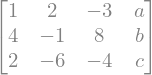

In [28]:
a, b, c = sy.symbols('a, b, c', real = True)
A = sy.Matrix([[1, 2, -3, a], [4, -1, 8, b], [2, -6, -4, c]]); A

We can immediately achieve the symbolic solution by using ```.rref()``` method.

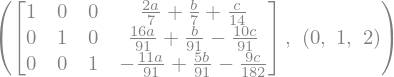

In [29]:
A_rref = A.rref(); A_rref

Of course, we can substitute values of $a$, $b$ and $c$ to get a specific solution. 

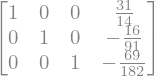

In [30]:
vDict = {a: 3, b: 6, c: 7}
A_rref = A_rref[0].subs(vDict);A_rref # define a dictionary for special values to substitute in

## <font face="gotham" color="purple"> Example: Polynomials </font>

Consider this question : How to find a cubic polynomial that passes through each of these points $(1,3)$,$(2, -2)$ ,$(3, -5)$, and $(4, 0)$.

The form of cubic polynomial is 

\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3
\end{align}
We substitute all the points:

\begin{align}
(x,y)&=(1,3)\qquad\longrightarrow\qquad \ 2=a_0+3a_1+9a_2 +27a_3 \\
(x,y)&=(2,-2)\qquad\longrightarrow\qquad 3=a_0+a_1+a_2+a_3\\
(x,y)&=(3,-5)\qquad\longrightarrow\qquad 2=a_0-4a_1+16a_2-64a_3\\
(x,y)&=(4,0)\qquad\longrightarrow\qquad -2=a_0+2a_1+4a_2+8a_3
\end{align}

It turns to be a linear system, the rest should be familiar already.

The augmented matrix is 

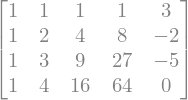

In [31]:
A = sy.Matrix([[1, 1, 1, 1, 3], [1, 2, 4, 8, -2], [1, 3, 9, 27, -5], [1, 4, 16, 64, 0]]); A

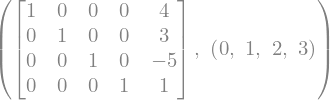

In [32]:
A_rref = A.rref(); A_rref

In [33]:
A_rref = np.array(A_rref[0]); A_rref

array([[1, 0, 0, 0, 4],
       [0, 1, 0, 0, 3],
       [0, 0, 1, 0, -5],
       [0, 0, 0, 1, 1]], dtype=object)

The last column is the solution, i.e. the coefficients of the cubic polynomial.

In [34]:
poly_coef = A_rref.astype(float)[:,-1]; poly_coef

array([ 4.,  3., -5.,  1.])

Cubic polynomial form is:
\begin{align}
y = 4 + 3x - 5x^2 + x^3
\end{align}

Since we have the specific form of the cubic polynomial, we can plot it

In [35]:
x = np.linspace(-5, 5, 40)
y = poly_coef[0] + poly_coef[1]*x + poly_coef[2]*x**2 + poly_coef[3]*x**3

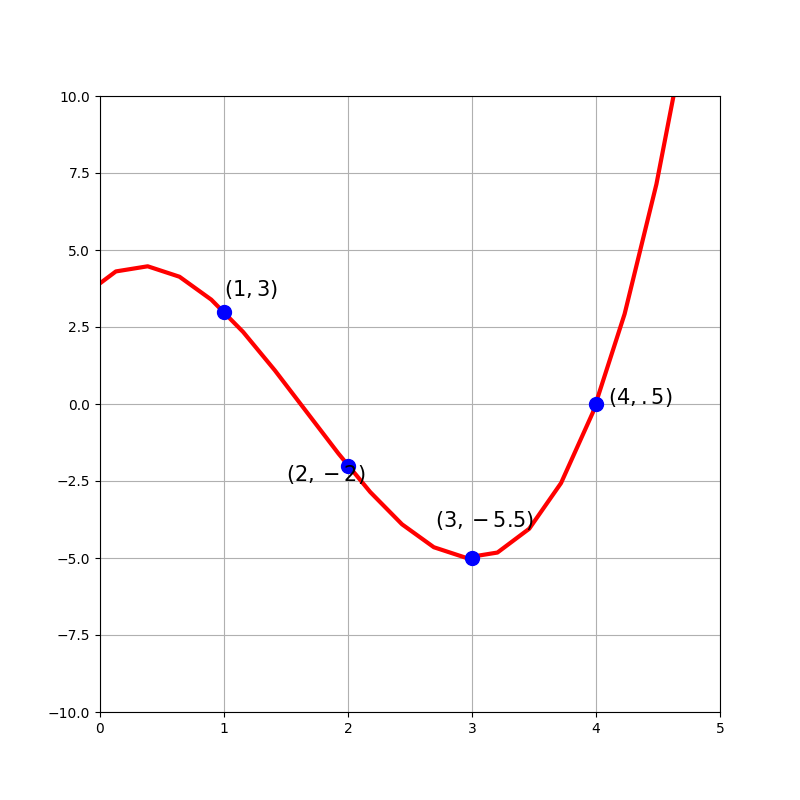

In [36]:
fig, ax = plt.subplots(figsize = (8, 8))
ax.plot(x, y, lw = 3, color ='red')
ax.scatter([1, 2, 3, 4], [3, -2, -5, 0], s = 100, color = 'blue', zorder = 3)
ax.grid()
ax.set_xlim([0, 5])
ax.set_ylim([-10, 10])

ax.text(1, 3.5, '$(1, 3)$', fontsize = 15)
ax.text(1.5, -2.5, '$(2, -2)$', fontsize = 15)
ax.text(2.7, -4, '$(3, -5.5)$', fontsize = 15)
ax.text(4.1, 0, '$(4, .5)$', fontsize = 15)
plt.show()

Now you know the trick, try another 5 points: $(1,2)$, $(2,5)$, $(3,8)$, $(4,6)$, $(5, 9)$. And polynomial form is 
\begin{align}
y=a_0+a_1x+a_2x^2+a_3x^3+a_4x^4
\end{align}

The augmented matrix is

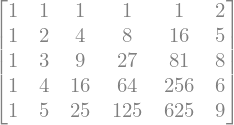

In [37]:
A = sy.Matrix([[1, 1, 1, 1, 1, 2],
               [1, 2, 4, 8, 16, 5], 
               [1, 3, 9, 27, 81, 8], 
               [1, 4, 16, 64, 256, 6], 
               [1, 5, 25,125, 625, 9]]); A

In [38]:
A_rref = A.rref()
A_rref = np.array(A_rref[0])
coef = A_rref.astype(float)[:,-1];coef

array([ 19.   , -37.417,  26.875,  -7.083,   0.625])

In [39]:
x = np.linspace(0, 6, 100)
y = coef[0] + coef[1]*x + coef[2]*x**2 + coef[3]*x**3 + coef[4]*x**4

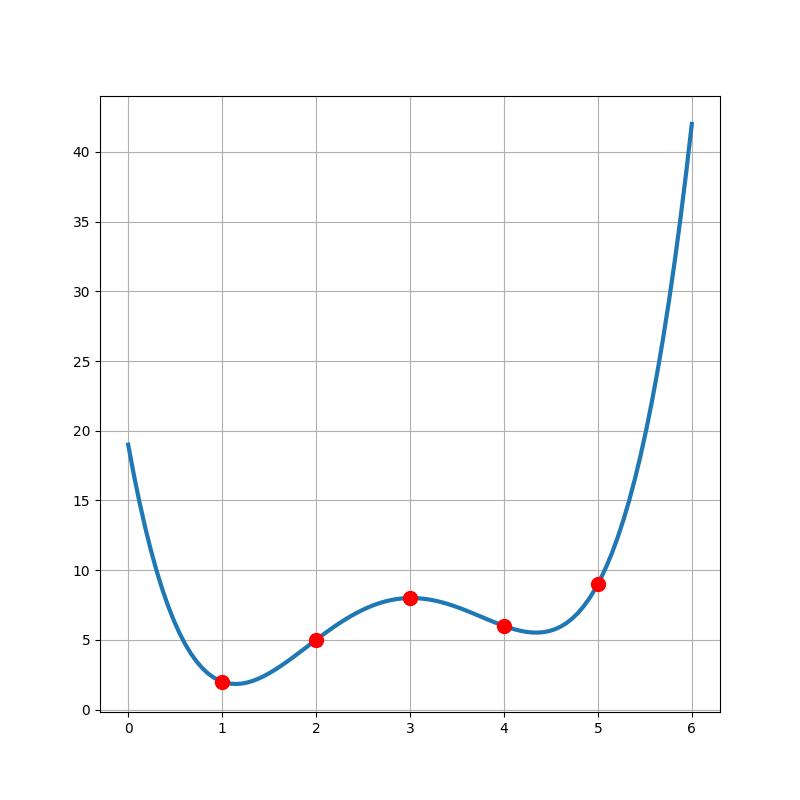

In [40]:
fig, ax = plt.subplots(figsize= (8, 8))
ax.plot(x, y, lw =3)
ax.scatter([1, 2, 3, 4, 5], [2, 5, 8, 6, 9], s= 100, color = 'red', zorder = 3)
ax.grid()

# <font face="gotham" color="purple"> Solving The System of Linear Equations By NumPy </font>

Set up the system $A  x =  b$, generate a random $A$ and $b$

In [41]:
A = np.round(10 * np.random.rand(5, 5))
b = np.round(10 * np.random.rand(5,))

In [42]:
x = np.linalg.solve(A, b);x

array([-0.247, -2.622, -0.654,  2.762,  1.128])

Let's verify if $ Ax = b$

In [43]:
A@x - b

array([0., 0., 0., 0., 0.])

They are technically zeros, due to some round-off errors omitted, that's why there is $-$ in front $0$.